<a href="https://colab.research.google.com/github/huggywuggy1289/data_branch2/blob/main/xorgate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torch.optim as optim
from matplotlib import pyplot as plt
import numpy as np

 XOR 게이트를 구현하는 경우에는 이진 분류 문제이기 때문에 입력 데이터는 0 또는 1의 값을 가져야 해서, 0과 1이 아닌 다른 값으로 변경하면 XOR 게이트를 올바르게 학습할 수 없다?

In [ ]:
X_train = torch.tensor([[0,0], [1,0], [1,1], [0,1]], dtype=torch.float)
# 변수명에 _train을 추가하는 것은 데이터의 종류를 명확히 하거나, 여러 데이터셋을 다루는 경우에 유용할 수 있다.
y_xor = torch.tensor([[0],[1],[1],[1]], dtype=torch.float)
print(X_train.shape, y_xor.shape)
X_train, y_xor

torch.Size([4, 2]) torch.Size([4, 1])


(tensor([[0., 0.],
         [1., 0.],
         [1., 1.],
         [0., 1.]]),
 tensor([[0.],
         [1.],
         [1.],
         [1.]]))

In [ ]:
class xor_model:
    def __init__(self):
        self.weight = torch.tensor([0.5, 0.5], dtype=torch.float)
        self.bias = torch.tensor([-0.25], dtype=torch.float)

In [ ]:
model = xor_model()
weight = model.weight
bias = model.bias

##HYPOTHESIS

$y= \mathbf{X}\mathbf{w} + b$

In [ ]:
w_xor = torch.zeros(2, requires_grad=True)
b_xor = torch.zeros(1, requires_grad=True)
w_xor, b_xor

(tensor([0., 0.], requires_grad=True), tensor([0.], requires_grad=True))

In [ ]:
hypothesis = (X_train @ w_xor + b_xor)
hypothesis

tensor([0., 0., 0., 0.], grad_fn=<AddBackward0>)

##xor게이트

In [ ]:
# xor gate

# initialize parameter
w_xor = torch.zeros(2, requires_grad=True)
b_xor = torch.zeros(1, requires_grad=True)

# hyperparameter
learning_rate = 0.01
optimizer = optim.SGD([w_xor, b_xor], lr=learning_rate)
loss_fn = nn.MSELoss()

epochs = 1000
# 에폭도 하나의 파라미터로, 몇번을 지정해줄지 설정하는 것이다.
# 즉 입력x에 대해 전체 데이터를 한번 학습하는게 1epochs이다.

for epoch in range(1, epochs + 1):
    hypothesis = X_train @ w_xor + b_xor  # and를 xor로 변경
    cost = loss_fn(hypothesis.view(-1, 1), y_xor)  # and를 xor로 변경

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()


    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {cost}') # Loss값이 정말 0으로 가는지 확인하는 거
print('cost:', cost)
w_xor, b_xor

Epoch: 100, Loss: 0.0758245438337326
Epoch: 200, Loss: 0.06902501732110977
Epoch: 300, Loss: 0.06597878783941269
Epoch: 400, Loss: 0.06435517221689224
Epoch: 500, Loss: 0.06348933279514313
Epoch: 600, Loss: 0.06302758306264877
Epoch: 700, Loss: 0.06278134882450104
Epoch: 800, Loss: 0.06265003979206085
Epoch: 900, Loss: 0.06258000433444977
Epoch: 1000, Loss: 0.06254266947507858
cost: tensor(0.0625, grad_fn=<MseLossBackward0>)


(tensor([0.4911, 0.4911], requires_grad=True),
 tensor([0.2606], requires_grad=True))

In [ ]:
def predict(x, w=None, b=None):
    return (x @ w + b)

In [ ]:
predict(X_train, w=w_xor, b=b_xor)

tensor([0.2606, 0.7517, 1.2428, 0.7517], grad_fn=<AddBackward0>)

In [ ]:
torch.where(predict(X_train, w=w_xor, b=b_xor)>0.5, 1., 0.) # y가 0.5이상은 1(true), 반대는 0(false)을 구현한다.

tensor([0., 1., 1., 1.])

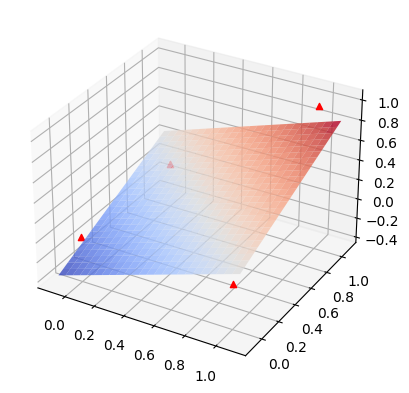

In [ ]:
# plot XOR GATE?

x1 = np.arange(-0.1, 1.1, 0.05)
x2 = np.arange(-0.1, 1.1, 0.05)
x1, x2 = np.meshgrid(x1, x2) #두 변수의 조합에 따른 모든 가능한 좌표를 만든다는 의미이고, 이 좌표들에 대해 y값을 계산한다.
y = 0.4911 * x1 + 0.4911 * x2 - 0.2606
# 주어진 숫자들은 해당 선형 함수를 정의하는 계수(coefficient)들이라고 설명되어 있는데 정확히 무슨뜻?
#(tensor([0.4911, 0.4911], requires_grad=True), tensor([0.2606], requires_grad=True)) 에 결과값을 그대로 X랑 Y에 대입하는 것이다.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(0, 0, 0, marker='^', c='r')
ax.scatter(0, 1, 0, marker='^', c='r')
ax.scatter(1, 0, 0, marker='^', c='r')
ax.scatter(1, 1, 1, marker='^', c='r')
ax.plot_surface(x1, x2, y, cmap='coolwarm', alpha=0.8)